<a href="https://colab.research.google.com/github/mesatg/DataScienceToolsAndEcosystem/blob/main/ZOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🐾 Hayvan Türlerine Göre Gruplama Tablosu:
   Hayvan Türü  Hayvan Sayısı
0            1             41
1            2             20
2            4             13
3            7             10
4            6              8
5            3              5
6            5              4

🐶 Özelliklerin Sıklığı Tablosu:
    Özellik  Sahip Olan  Sahip Olmayan
0      hair          43             58
1  feathers          20             81
2      milk          41             60
3  airborne          24             77
4   aquatic          36             65

🎨 Bacak Sayısına Göre Hayvanlar:
   Bacak Sayısı  Hayvan Sayısı
0             0             23
1             2             27
2             4             38
3             5              1
4             6             10
5             8              2

🌊 Yaşam Alanına Göre Hayvanlar:
  Yaşam Alanı  Hayvan Sayısı
0      Karada             41
1        Suda             36
2      Havada             24

💡 Tehlikeli Hayvanlar Tablosu:
   Özellik  Hayvan

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


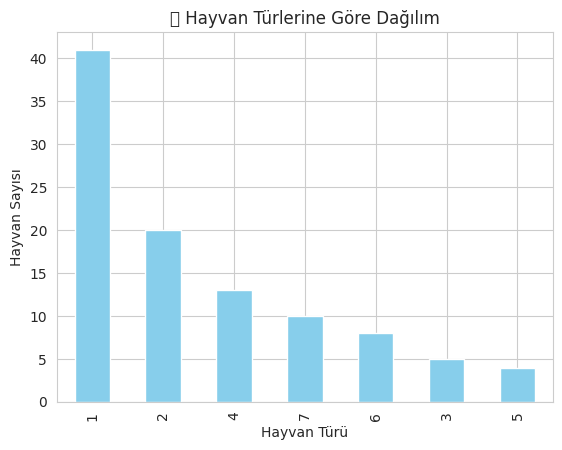

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


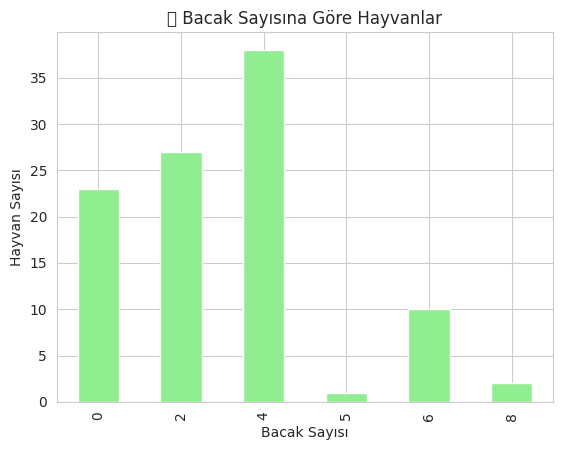

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


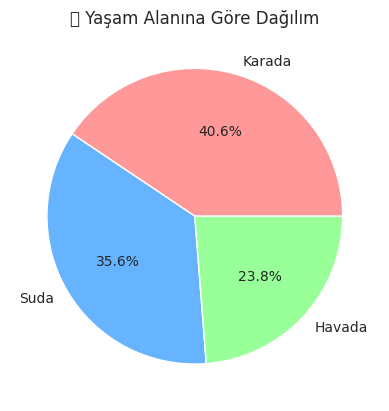

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


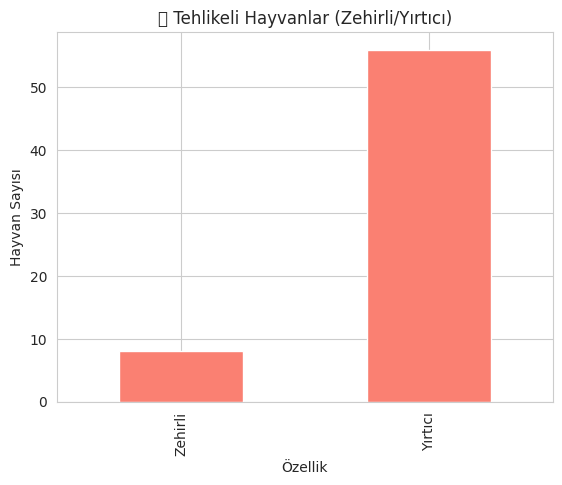

In [2]:
# Gerekli kütüphanelerin yüklenmesi
!pip install scikit-learn matplotlib seaborn pandas

# 1. Kütüphaneleri içe aktarma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Veri kümesini yükleme
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data'
columns = [
    'animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
    'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
    'legs', 'tail', 'domestic', 'catsize', 'class_type'
]
zoo_data = pd.read_csv(url, header=None, names=columns)

# 3. 🐾 Hayvan Türlerine Göre Gruplama Tablosu
species_counts = zoo_data['class_type'].value_counts().reset_index()
species_counts.columns = ['Hayvan Türü', 'Hayvan Sayısı']
print("\n🐾 Hayvan Türlerine Göre Gruplama Tablosu:")
print(species_counts)

# 4. 🐶 Özelliklerin Sıklığı Tablosu
features = ['hair', 'feathers', 'milk', 'airborne', 'aquatic']
feature_counts = pd.DataFrame({
    'Özellik': features,
    'Sahip Olan': [zoo_data[feat].sum() for feat in features],
    'Sahip Olmayan': [len(zoo_data) - zoo_data[feat].sum() for feat in features]
})
print("\n🐶 Özelliklerin Sıklığı Tablosu:")
print(feature_counts)

# 5. 🎨 Bacak Sayısına Göre Hayvanlar
legs_count = zoo_data['legs'].value_counts().sort_index().reset_index()
legs_count.columns = ['Bacak Sayısı', 'Hayvan Sayısı']
print("\n🎨 Bacak Sayısına Göre Hayvanlar:")
print(legs_count)

# 6. 🌊 Yaşam Alanına Göre Hayvanlar
environments = pd.DataFrame({
    'Yaşam Alanı': ['Karada', 'Suda', 'Havada'],
    'Hayvan Sayısı': [
        len(zoo_data) - zoo_data['aquatic'].sum() - zoo_data['airborne'].sum(),
        zoo_data['aquatic'].sum(),
        zoo_data['airborne'].sum()
    ]
})
print("\n🌊 Yaşam Alanına Göre Hayvanlar:")
print(environments)

# 7. 💡 Tehlikeli Hayvanlar Tablosu
dangerous_animals = pd.DataFrame({
    'Özellik': ['Zehirli', 'Yırtıcı'],
    'Hayvan Sayısı': [zoo_data['venomous'].sum(), zoo_data['predator'].sum()]
})
print("\n💡 Tehlikeli Hayvanlar Tablosu:")
print(dangerous_animals)

# 🎨 Basit Grafiklerle Görselleştirme
sns.set_style("whitegrid")

# Hayvan Türleri Grafiği
species_counts.plot(kind='bar', x='Hayvan Türü', y='Hayvan Sayısı', legend=False, color='skyblue')
plt.title('🐾 Hayvan Türlerine Göre Dağılım')
plt.ylabel('Hayvan Sayısı')
plt.show()

# Bacak Sayısı Grafiği
legs_count.plot(kind='bar', x='Bacak Sayısı', y='Hayvan Sayısı', legend=False, color='lightgreen')
plt.title('🎨 Bacak Sayısına Göre Hayvanlar')
plt.ylabel('Hayvan Sayısı')
plt.show()

# Yaşam Alanı Pastası
environments.set_index('Yaşam Alanı').plot(kind='pie', y='Hayvan Sayısı', autopct='%1.1f%%', legend=False, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('🌊 Yaşam Alanına Göre Dağılım')
plt.ylabel('')
plt.show()

# Tehlikeli Hayvanlar Grafiği
dangerous_animals.plot(kind='bar', x='Özellik', y='Hayvan Sayısı', legend=False, color='salmon')
plt.title('💡 Tehlikeli Hayvanlar (Zehirli/Yırtıcı)')
plt.ylabel('Hayvan Sayısı')
plt.show()
